In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
%matplotlib notebook
from Reinforcement_Learning import *
from Maze import *
from DrawMaze import *
import cv2
import matplotlib.pyplot as plt

In [2]:
#迷路生成
PATH = 0 #道
WALL = 1 #壁
STR = 'S' #スタート
GOL = 'G' #ゴール
mWidth, mHeight = 20, 20
maze = Maze(mWidth, mHeight)
maze.set_out_wall()
maze.set_inner_wall_botaoshi()
maze.set_start_goal()
maze.print_maze()
mWidth, mHeight = maze.get_width_height()
# 迷路データ maze.maze[x][y]

＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃
＃Ｓ　　＃　　　　　　　　　　　＃　＃　＃
＃　＃　＃　＃　＃＃＃　＃＃＃　＃　＃　＃
＃　＃　＃　＃　　　＃　＃　＃　　　　　＃
＃　＃＃＃　＃＃＃　＃　＃　＃　＃＃＃　＃
＃　＃　　　　　＃　＃　＃　＃　　　＃　＃
＃　＃　＃＃＃　＃　＃＃＃　＃　＃＃＃　＃
＃　　　　　＃　＃　　　　　＃　　　＃　＃
＃＃＃　＃＃＃　＃＃＃＃＃＃＃＃＃＃＃＃＃
＃　　　　　＃　　　　　　　　　　　　　＃
＃　＃　＃＃＃＃＃　＃　＃＃＃　＃　＃＃＃
＃　＃　　　＃　＃　＃　　　＃　＃　＃　＃
＃　＃＃＃＃＃　＃＃＃　＃＃＃＃＃＃＃　＃
＃　＃　＃　　　　　＃　＃　　　　　　　＃
＃　＃　＃　＃＃＃＃＃　＃　＃＃＃＃＃＃＃
＃　　　　　　　　　＃　＃　＃　　　＃　＃
＃＃＃　＃＃＃＃＃　＃＃＃　＃　＃　＃　＃
＃　＃　　　　　＃　＃　　　＃　＃　＃　＃
＃　＃　＃＃＃　＃　＃　＃＃＃　＃＃＃　＃
＃　　　　　＃　＃　　　　　　　　　　Ｇ＃
＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃＃


In [3]:
# 強化学習
# q値更新
learningRate = 0.1 #学習係数α
discountRate = 0.9 #割引率γ
qUpdate = QLearning(learningRate, discountRate) # Q学習

#行動選択方法
ep = 0.3 #ε
actionSelect = EpGreedy(ep) #ε-greedy 

learning = ReinforcementLearning(mWidth, mHeight, qUpdate, actionSelect)

In [4]:
#壁でないか確認
def is_not_wall(x, y):
    if maze.maze[x][y] == WALL:
        return False
    else:
        return True

In [5]:
# 迷路描画機能
imgW = 800
imgH = 800
draw = DrawMaze(imgW, imgH, maze.maze)

In [6]:
# 学習初期化
str_x, str_y = maze.get_start() #TODO Start位置の取得関数
gol_x, gol_y = maze.get_goal() #TODO Goal位置の取得関数
gol_reward = 30 #成功報酬
sx, sy = str_x, str_y
maxAction = 200 # 最大行動数
maxResetAction = (mWidth + mHeight) * 3 # リセットになる行動回数
resetAction = 0

<IPython.core.display.Javascript object>


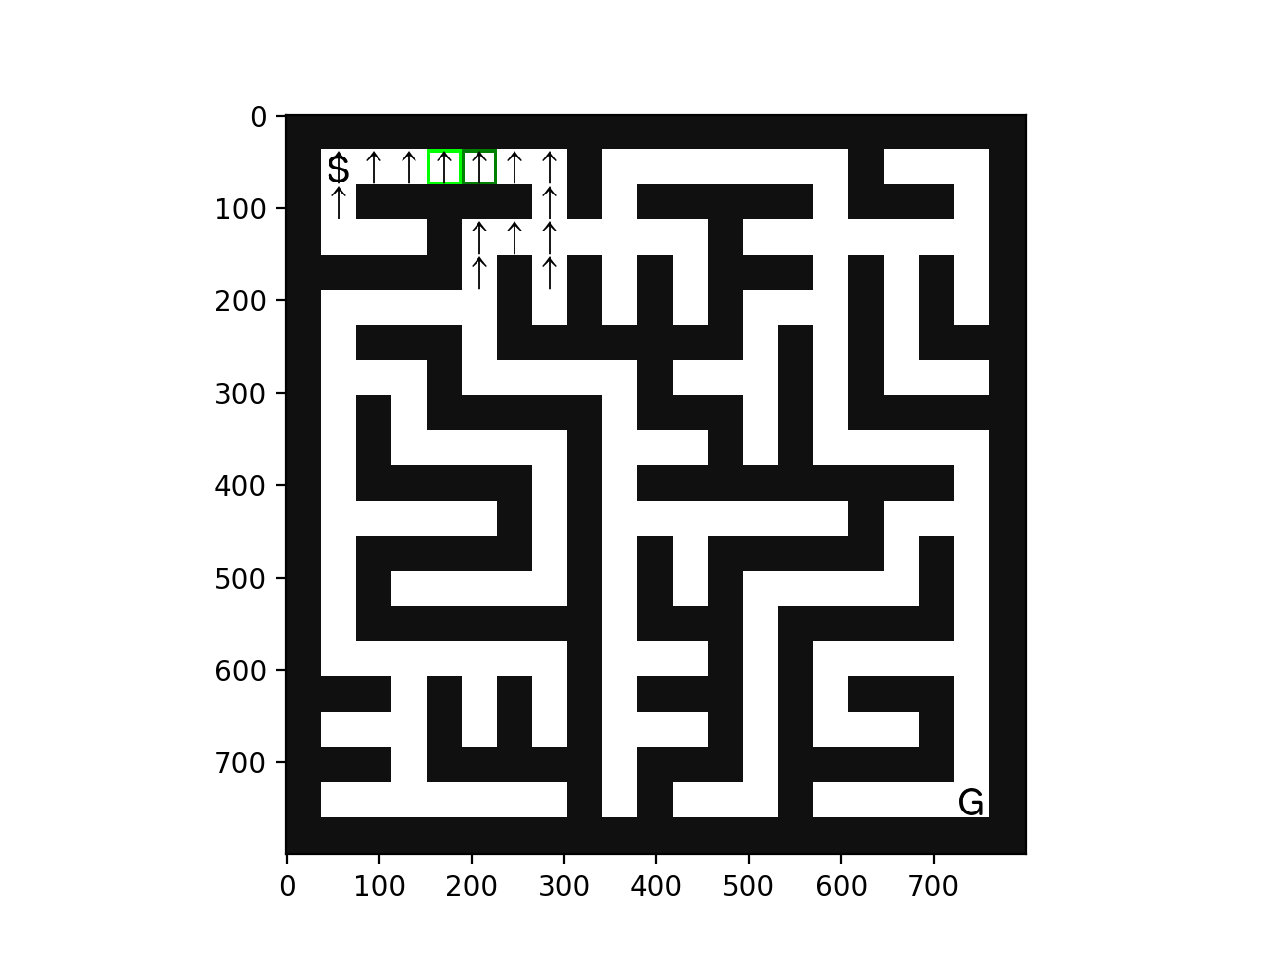

In [7]:
for t in range(0, maxAction):
    # 次の行動を決定
    while True:
        nx, ny, action = learning.get_next_state(sx, sy)
        # 今回は次の行動が壁の時はキャンセルする
        if is_not_wall(nx, ny):
            break
    # Q値更新
    sq = learning.get_q_val(sx, sy, action)
    na, nq = learning.get_q_max_val(nx, ny)
    reward = gol_reward if (nx == gol_x and ny == gol_y) else 0
    p = [sq, nq, reward]
    learning.update_q_val(sx, sy, action, p)
    
    # 迷路描画
    draw.drawMaze(learning, gol_reward, sx, sy, nx, ny)
    sx, sy = nx, ny

In [8]:
#結果出力(動画)
# encoder(for mp4)
fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')
# output file name, encoder, fps, size(fit to image size)
video = cv2.VideoWriter('video.mp4',fourcc, 20.0, (imgW, imgH))
if not video.isOpened():
    print("can't be opened")
    sys.exit()
    
for i in range(0, maxAction):
    # hoge0000.png, hoge0001.png,..., hoge0090.png
    img = cv2.imread('output/images/img_' + str(i)+ '.jpg')

    # can't read image, escape
    if img is None:
        print("can't read")
        break

    # add
    video.write(img)
    print("read image " + str(i))

video.release()
print('written')

read image 0
read image 1
read image 2
read image 3
read image 4
read image 5
read image 6
read image 7
read image 8
read image 9
read image 10
read image 11
read image 12
read image 13
read image 14
read image 15
read image 16
read image 17
read image 18
read image 19
read image 20
read image 21
read image 22
read image 23
read image 24
read image 25
read image 26
read image 27
read image 28
read image 29
read image 30
read image 31
read image 32
read image 33
read image 34
read image 35
read image 36
read image 37
read image 38
read image 39
read image 40
read image 41
read image 42
read image 43
read image 44
read image 45
read image 46
read image 47
read image 48
read image 49
read image 50
read image 51
read image 52
read image 53
read image 54
read image 55
read image 56
read image 57
read image 58
read image 59
read image 60
read image 61
read image 62
read image 63
read image 64
read image 65
read image 66
read image 67
read image 68
read image 69
read image 70
read image 71
re